In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

from pathlib import Path
import pandas as pd
import numpy as np
import collections
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dir = Path('../data/')
result_dir = Path('../result/')
methods = ['crowdea', 'crowdbt', 'bt']
method_print = {'crowdea': 'CrowDEA', 'crowdbt': 'CrowdBT', 'bt': 'BT'}
data_cat = 'design'
data_keys = ['olympic', 'ai_character']

<Figure size 432x288 with 0 Axes>

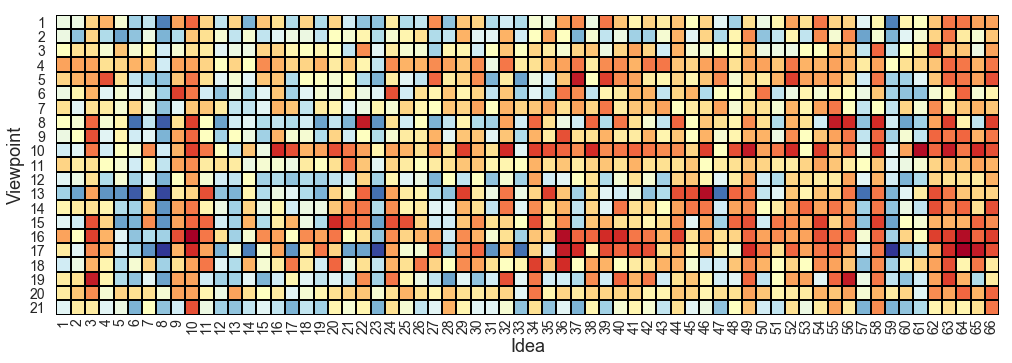

In [44]:
data_key = 'ai_character'
truth_df = pd.read_csv(data_dir / data_cat / data_key / 'truth.tsv', index_col=0, sep='\t')    
scores = truth_df.loc[:, [c for c in truth_df.columns if c[0] == '*']].values.transpose()

#v_idx = scores.mean(axis=1).argsort()[::-1]
#scores = scores[v_idx,:]

sns.set_style("white")
sns.set_context("talk", rc={'xtick.labelsize': 14, 
                            'ytick.labelsize': 14, 
                            'xtick.major.size': 0, 
                            'ytick.major.width': 1, 
                            'ytick.major.size': 8})    

vmin = np.min(scores)
vmax = np.max(scores)

sns.despine(left=True, bottom=True)

#cbar_ax = fig.add_axes([.91, .3, .03, .4])

plt.figure(figsize=(16, 7))
sns.heatmap(scores, vmin=vmin, vmax=vmax, cmap='RdYlBu_r', square=True, linecolor='black', 
            yticklabels=range(1, scores.shape[0]+1), linewidths=1, 
            xticklabels=range(1, truth_df.shape[0]+1), cbar=False)
#plt.set_title(method_print[method])
plt.xlabel('Idea')
plt.ylabel('Viewpoint')

plt.tight_layout(rect=[0, 0, .9, 1])
plt.savefig('heatmap_truth_{}.pdf'.format(data_key.replace('ai_', '')))

In [40]:
[c for c in truth_df.columns if c[0] == '*'][19]

'*viewpoint78'

In [ ]:
item_df = pd.read_csv(Path('../data/') / data_cat / data_key / 'idea.tsv', sep='\t', index_col=0)

sns.set(style="ticks")
sns.set_context("talk")

Nr = len(methods)
Nc = 10

fig, axs = plt.subplots(Nr, Nc, figsize=(16,7))

images = []
for i in range(Nr):
    method = methods[i]
    for j in range(Nc):
        idx = top_items_index_dict[data_key][method][j]
        im = Image.open(Path('../data/') / data_cat / data_key / 'img' / item_df.loc[idx, 'idea'], "r")
        images.append(axs[i,j].imshow(np.array(im)))
        axs[i,j].set_yticklabels([])
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticks([])
        axs[i,j].set_xticks([])

pad = 5

for ax, row in zip(axs[:,0], methods):
    ax.annotate(method_print[row], xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points', ha='right', va='center')

for ax, col in zip(axs[-1, :], range(1, 11)):
    ax.annotate(col, xy=(0, 0.5), xytext=(0, -ax.xaxis.labelpad - pad),
                        xycoords=ax.xaxis.label, textcoords='offset points', ha='center', va='center')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.xlabel('Idea')
#plt.savefig('ranking_{}.pdf'.format(data_key.replace('ai_', '')))